<a href="https://colab.research.google.com/github/arhamk15/physics-projects/blob/main/Heart_Disease_prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Loading data into pandas dataframe

In [96]:
heart_disease_data = pd.read_csv('framingham.csv')

data = heart_disease_data.dropna()


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


# Data visualisation

/tmp/ipython-input-23-3162270331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipython-input-23-3162270331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipython-input-23-3162270331.py:4: UserWarning: 

`distplot` is a deprecated function and will be re

ValueError: num must be an integer with 1 <= num <= 9, not 10

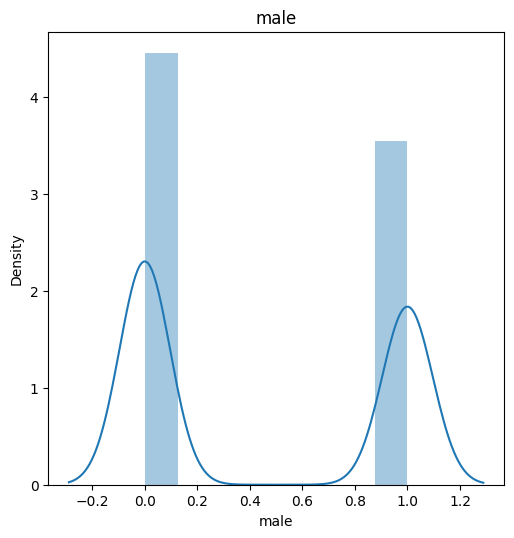

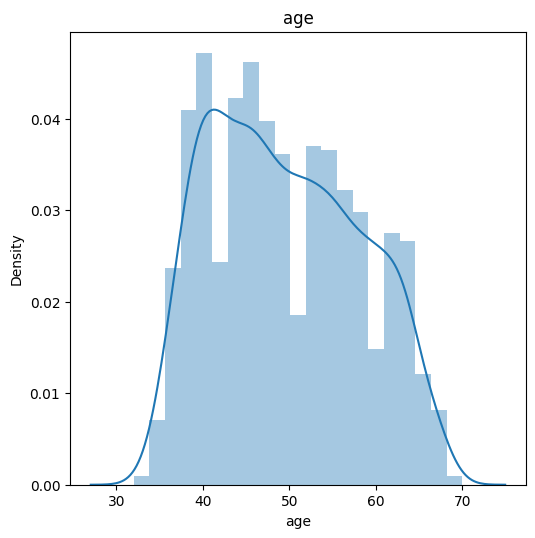

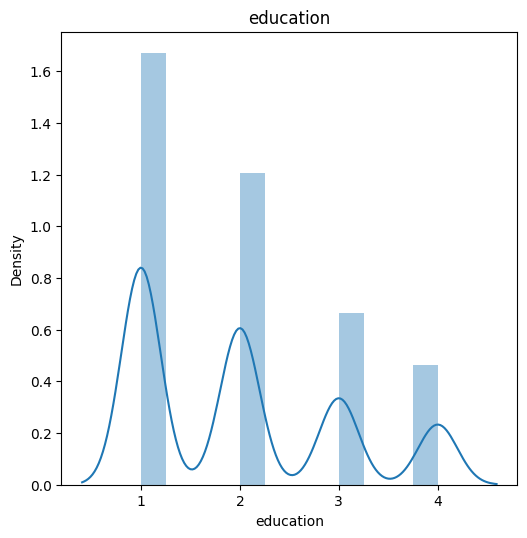

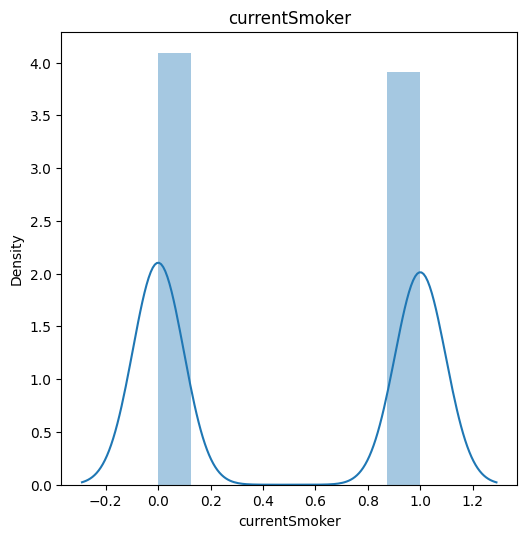

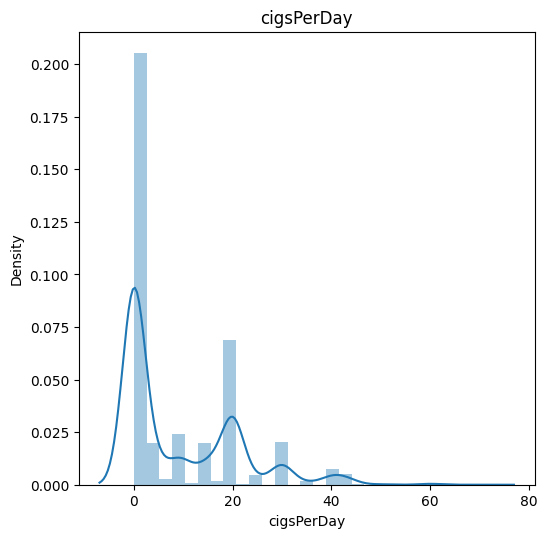

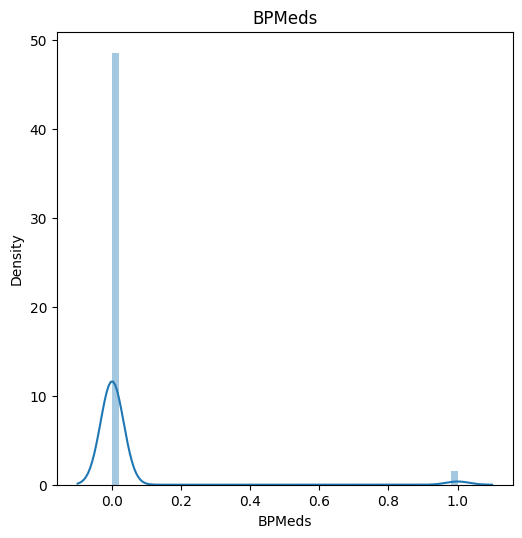

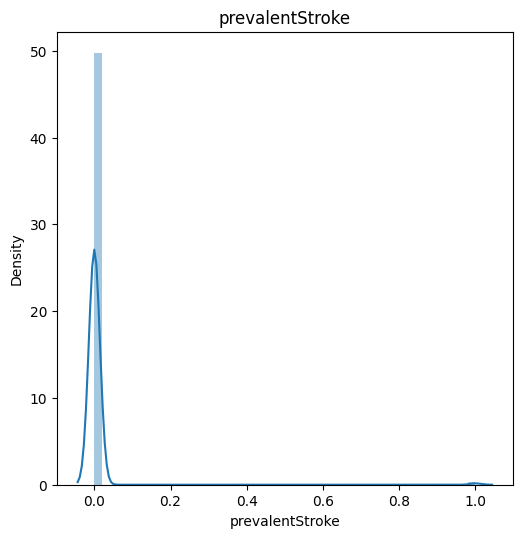

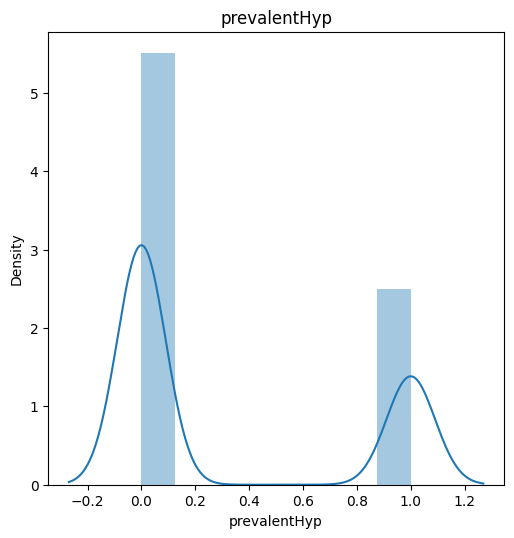

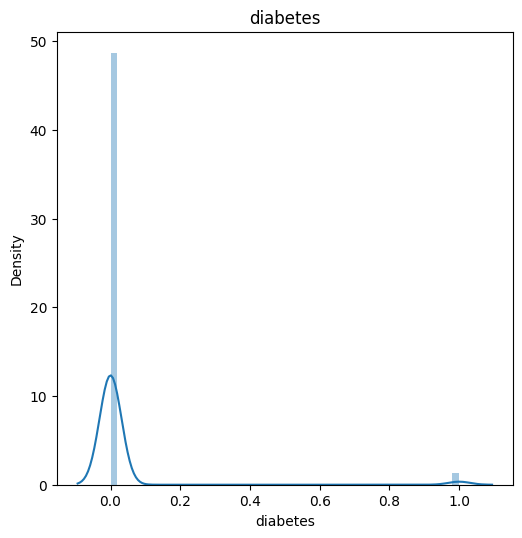

<Figure size 2000x2000 with 0 Axes>

In [23]:
for i, col in enumerate(data.columns):
  plt.figure(figsize=(20, 20))
  plt.subplot(3, 3, i+1)
  sns.distplot(data[col])
  plt.title(col)
plt.show()

for i, col in enumerate(data.columns):
  plt.figure(figsize=(20, 20))
  plt.subplot(3, 3, i+1)
  #plt.hist(data[col])
  plt.title(col)
plt.show()
    #sns.distplot(data[col])
    #plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
X = st.fit_transform(X)


'''
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='auto')
X, y = smt.fit_resample(X, y)
y.value_counts()'''




 ### works best for imbalanced data
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()


'''

from imblearn.over_sampling import BorderlineSMOTE

blsmote = BorderlineSMOTE(sampling_strategy='minority', kind='borderline-1')
X, y = blsmote.fit_resample(X, y)
y.value_counts()'''

'''
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X, y = smote_enn.fit_resample(X, y)
y.value_counts() '''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [114]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.7689196995956095


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       902
           1       0.76      0.76      0.76       829

    accuracy                           0.77      1731
   macro avg       0.77      0.77      0.77      1731
weighted avg       0.77      0.77      0.77      1731



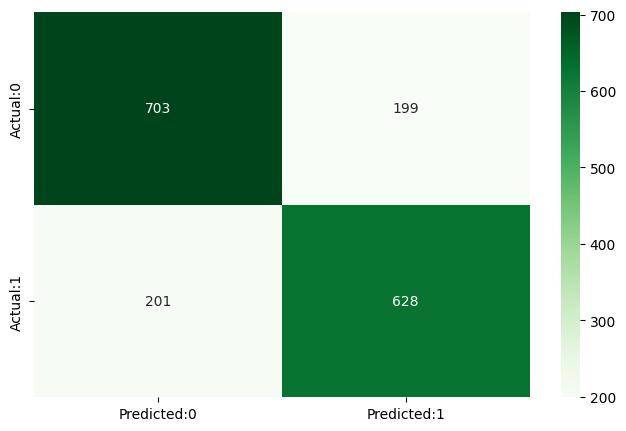

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

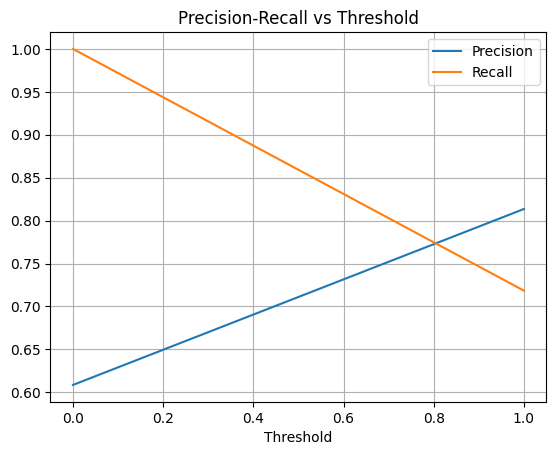

In [91]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid(True)
plt.show()